# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#set up empty lists, variables and url.
City = []
Lat =[]
Lng =[]
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed =[]
Country= []
Date = []
x = 1
url = "http://api.openweathermap.org/data/2.5/weather?"

#loop through list of cities, and populate lists. Declare expections and move on.
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    print (f"Processing Record {x} of {len(cities)}, {city}")
    query_url = f"{url}appid={weather_api_key}&q={city}"        
    geo_data = requests.get(query_url).json()
    try:
        Lat.append(geo_data['coord']['lat'])
        Lng.append(geo_data['coord']['lon'])
        Max_Temp.append(9/5*(geo_data['main']['temp_max']-273.15)+32)
        Humidity.append(geo_data['main']['humidity'])
        Cloudiness.append(geo_data['clouds']['all'])
        Wind_Speed.append(geo_data['wind']['speed'])
        Country.append(geo_data['sys']['country'])
        Date.append(geo_data['dt'])
        City.append(city)
    except KeyError:
        print(f"Ya, so {city} doesn't exist. In this database, at least. Moving on...")
    x = x +1    
print("That took a while. But we're done now")     

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 591, castro
Processing Record 2 of 591, busselton
Processing Record 3 of 591, dingle
Processing Record 4 of 591, avarua
Processing Record 5 of 591, nikolskoye
Processing Record 6 of 591, cochrane
Processing Record 7 of 591, hilo
Processing Record 8 of 591, hermon
Processing Record 9 of 591, aktash
Processing Record 10 of 591, peniche
Processing Record 11 of 591, fukuma
Processing Record 12 of 591, caucaia
Processing Record 13 of 591, tuktoyaktuk
Processing Record 14 of 591, codrington
Processing Record 15 of 591, madera
Processing Record 16 of 591, saint-philippe
Processing Record 17 of 591, severo-kurilsk
Processing Record 18 of 591, cabo san lucas
Processing Record 19 of 591, katsuura
Processing Record 20 of 591, kapaa
Processing Record 21 of 591, tunduru
Ya, so tunduru doesn't exist. In this database, at least. Moving on...
Processing Record 22 of 591, palabuhanratu
Ya, so palabuhanratu doesn't exist. In t

Processing Record 182 of 591, arraial do cabo
Processing Record 183 of 591, pendleton
Processing Record 184 of 591, westport
Processing Record 185 of 591, palaiokhora
Ya, so palaiokhora doesn't exist. In this database, at least. Moving on...
Processing Record 186 of 591, hamilton
Processing Record 187 of 591, jalu
Processing Record 188 of 591, machachi
Processing Record 189 of 591, bethel
Processing Record 190 of 591, zhangjiakou
Processing Record 191 of 591, yunjinghong
Ya, so yunjinghong doesn't exist. In this database, at least. Moving on...
Processing Record 192 of 591, sao filipe
Processing Record 193 of 591, naze
Processing Record 194 of 591, maple creek
Processing Record 195 of 591, sibolga
Processing Record 196 of 591, kristiansund
Processing Record 197 of 591, alyangula
Processing Record 198 of 591, muros
Processing Record 199 of 591, fortuna
Processing Record 200 of 591, los llanos de aridane
Processing Record 201 of 591, fukue
Processing Record 202 of 591, aykhal
Processing 

Processing Record 365 of 591, nyurba
Processing Record 366 of 591, hihifo
Ya, so hihifo doesn't exist. In this database, at least. Moving on...
Processing Record 367 of 591, karamken
Ya, so karamken doesn't exist. In this database, at least. Moving on...
Processing Record 368 of 591, touros
Processing Record 369 of 591, attawapiskat
Ya, so attawapiskat doesn't exist. In this database, at least. Moving on...
Processing Record 370 of 591, okhotsk
Processing Record 371 of 591, parauna
Processing Record 372 of 591, laguna
Processing Record 373 of 591, namibe
Processing Record 374 of 591, kumano
Processing Record 375 of 591, limulunga
Processing Record 376 of 591, sao felix do xingu
Processing Record 377 of 591, igrim
Processing Record 378 of 591, road town
Processing Record 379 of 591, grand river south east
Ya, so grand river south east doesn't exist. In this database, at least. Moving on...
Processing Record 380 of 591, harper
Processing Record 381 of 591, bend
Processing Record 382 of 5

Processing Record 545 of 591, alugan
Processing Record 546 of 591, matongo
Processing Record 547 of 591, trairi
Processing Record 548 of 591, havre-saint-pierre
Processing Record 549 of 591, nuuk
Processing Record 550 of 591, makarov
Processing Record 551 of 591, santa isabel
Processing Record 552 of 591, pimenta bueno
Processing Record 553 of 591, rodney
Processing Record 554 of 591, havoysund
Processing Record 555 of 591, palmerston
Processing Record 556 of 591, quartucciu
Processing Record 557 of 591, durango
Processing Record 558 of 591, ulagan
Processing Record 559 of 591, itapetinga
Processing Record 560 of 591, luancheng
Processing Record 561 of 591, namatanai
Processing Record 562 of 591, ilinge
Processing Record 563 of 591, yirol
Ya, so yirol doesn't exist. In this database, at least. Moving on...
Processing Record 564 of 591, asino
Processing Record 565 of 591, iquitos
Processing Record 566 of 591, oda
Processing Record 567 of 591, maharajganj
Processing Record 568 of 591, it

Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame

In [4]:
#set up and populate a dataframe. and count the columns.
city_data_df = pd.DataFrame({"City": City,
"Lat":Lat,
"Lng":Lng,
"Max Temp":Max_Temp,
"Humidity":Humidity,
"Cloudiness":Cloudiness,
"Wind Speed":Wind_Speed,
"Country":Country,
"Date":Date})
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castro,-24.79,-50.01,55.328,95,83,4.02,BR,1592273614
1,busselton,-33.65,115.33,60.998,72,99,4.70,AU,1592273614
2,dingle,11.00,122.67,86.468,68,100,5.00,PH,1592273614
3,avarua,-21.21,-159.78,73.400,56,56,3.60,CK,1592273615
4,nikolskoye,59.70,30.79,64.994,88,11,1.05,RU,1592273615


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_data_df2 = city_data_df.loc[city_data_df['Humidity'] >100]
if len(city_data_df2) == 0:
    print("There are zero cities in this dataframe with humidity over 100")
else:
    city_data_df = city_data_df.loc[city_data_df['Humidity'] <=100]
    print(f"There was {len(city_data_df2)} cities in this dataframe with humidity over 100. There are gone now. Don't ask how. Let us never speak of this again.")   
print("This is a summary of how the cleaned up dataframe looks:")
clean_city_data_df = city_data_df
clean_city_data_df.describe()

There are zero cities in this dataframe with humidity over 100
This is a summary of how the cleaned up dataframe looks:


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,19.429299,17.733100,66.437985,69.795203,49.610701,4.380461,1.592274e+09
std,33.964715,90.172996,14.009942,20.852544,39.986200,15.905182,7.148586e+01
min,-54.800000,-179.170000,29.930000,8.000000,0.000000,0.180000,1.592273e+09
25%,-9.062500,-59.425000,56.273000,59.000000,1.000000,1.775000,1.592274e+09
50%,22.590000,23.075000,66.200000,74.000000,50.000000,3.030000,1.592274e+09
75%,48.762500,97.440000,77.436500,85.000000,90.750000,5.320000,1.592274e+09
max,78.220000,179.320000,98.618000,100.000000,100.000000,369.300000,1.592274e+09


In [7]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
clean_city_data_df = clean_city_data_df[['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']]
clean_city_data_df.index.name = "City_ID"
clean_city_data_df.to_csv(output_data_file, index=True, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This code plots the relationship between latitude and max temp. It shows that max temp increases as latitude gets closer to 0.


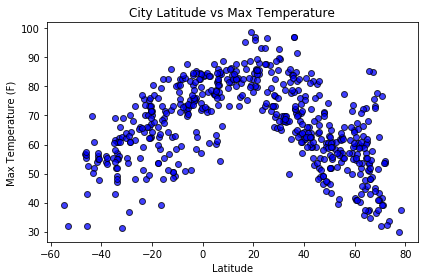

In [8]:
y_axis = clean_city_data_df['Max Temp']
x_axis = clean_city_data_df['Lat']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.tight_layout()
plt.savefig('../output_data/Lat_v_Temperature.png')
print('This code plots the relationship between latitude and max temp. It shows that max temp increases as latitude gets closer to 0.')
plt.show()

## Latitude vs. Humidity Plot

This code plots the relationship between latitude and humidity. It shows a weak relationship with max temp.


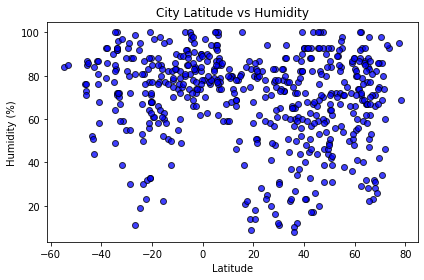

In [9]:
y_axis = clean_city_data_df['Humidity']
x_axis = clean_city_data_df['Lat']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.savefig('../output_data/Lat_v_Humidity.png')
print('This code plots the relationship between latitude and humidity. It shows a weak relationship with max temp.')
plt.show()

## Latitude vs. Cloudiness Plot

This code plots the relationship between latitude and cloudiness. It shows a weak relationship with max temp.


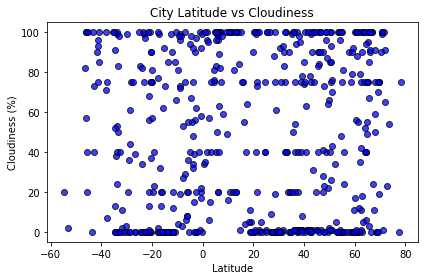

In [10]:
y_axis = clean_city_data_df['Cloudiness']
x_axis = clean_city_data_df['Lat']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
plt.savefig('../output_data/Lat_v_Cloudiness.png')
print('This code plots the relationship between latitude and cloudiness. It shows a weak relationship with max temp.')
plt.show()

## Latitude vs. Wind Speed Plot

This code plots the relationship between latitude and wind speed. It shows a weak relationship with max temp.


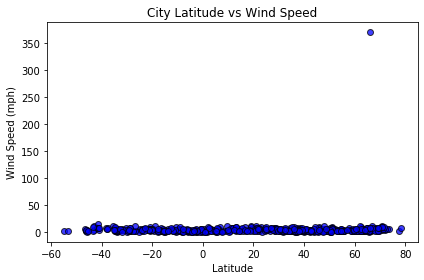

In [11]:
y_axis = clean_city_data_df['Wind Speed']
x_axis = clean_city_data_df['Lat']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
plt.savefig('../output_data/Lat_v_Wind_Speed.png')
print('This code plots the relationship between latitude and wind speed. It shows a weak relationship with max temp.')
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression_plot (df, y_axis):
    x_values = df['Lat']
    y_values = df[y_axis]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    df.plot(kind = 'scatter',x = 'Lat', y=y_axis)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"City Latitude vs {y_axis}")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_axis}')
    plt.figure(figsize=(50, 50))
    plt.tight_layout()
    print(f"The r-squared is: {round(rvalue**2,3)}")
    print(f'The line equation is: {line_eq}')
    if rvalue**2 > 0.60:
        print(f'This shows an explanatory relationship between Latitude and {y_axis}. An r-squared of {round(rvalue**2,3)} is decent.')
        print('Might be worth looking into more. Correlation is not causation tho, so do not get your hopes up.')
    else:
        print(f'This shows a weak or non-existent explanatory relationship between Latitude and {y_axis}. An r-squared of {round(rvalue**2,3)} is not great.')
        print('Correlation is not causation tho. Which is good, because this is weak sauce.')
    plt.show()

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = clean_city_data_df.loc[clean_city_data_df['Lat'] >0]
southern_df = clean_city_data_df.loc[clean_city_data_df['Lat'] <0]
print(f'There are {len(northern_df)} cities in the Northern Hemisphere dataframe, and {len(southern_df)} cities in the Southern Hemisphere dataframe.')
print(f'There are {len(clean_city_data_df)-len(northern_df)-len(southern_df)} cities at 0 Latitude.')

There are 357 cities in the Northern Hemisphere dataframe, and 185 cities in the Southern Hemisphere dataframe.
There are 0 cities at 0 Latitude.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.506
The line equation is: y = -0.51x + 87.83
This shows a weak or non-existent explanatory relationship between Latitude and Max Temp. An r-squared of 0.506 is not great.
Correlation is not causation tho. Which is good, because this is weak sauce.


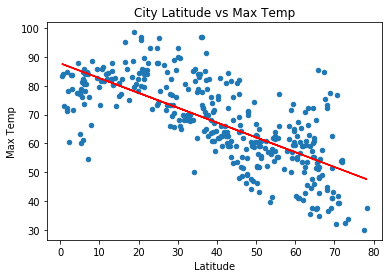

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [14]:
linear_regression_plot(northern_df, 'Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.398
The line equation is: y = 0.57x + 76.4
This shows a weak or non-existent explanatory relationship between Latitude and Max Temp. An r-squared of 0.398 is not great.
Correlation is not causation tho. Which is good, because this is weak sauce.


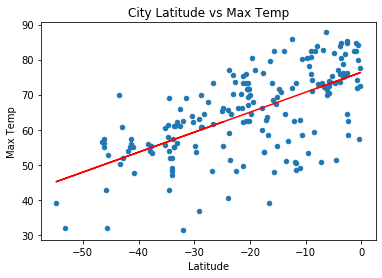

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [15]:
linear_regression_plot(southern_df, 'Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005
The line equation is: y = -0.08x + 70.25
This shows a weak or non-existent explanatory relationship between Latitude and Humidity. An r-squared of 0.005 is not great.
Correlation is not causation tho. Which is good, because this is weak sauce.


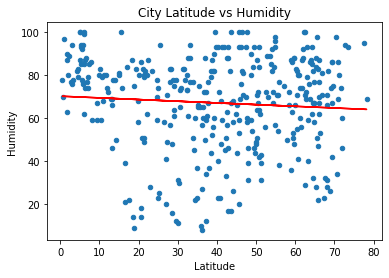

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [16]:
linear_regression_plot(northern_df, 'Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006
The line equation is: y = 0.1x + 77.08
This shows a weak or non-existent explanatory relationship between Latitude and Humidity. An r-squared of 0.006 is not great.
Correlation is not causation tho. Which is good, because this is weak sauce.


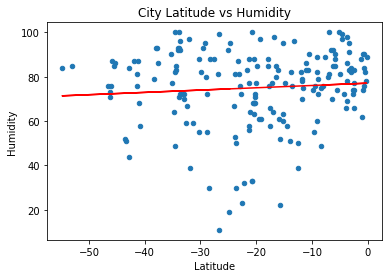

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
linear_regression_plot(southern_df, 'Humidity')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003
The line equation is: y = -0.1x + 55.86
This shows a weak or non-existent explanatory relationship between Latitude and Cloudiness. An r-squared of 0.003 is not great.
Correlation is not causation tho. Which is good, because this is weak sauce.


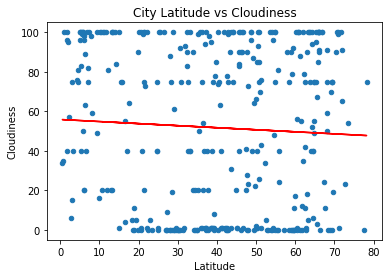

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [18]:
linear_regression_plot(northern_df, 'Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009
The line equation is: y = -0.28x + 39.9
This shows a weak or non-existent explanatory relationship between Latitude and Cloudiness. An r-squared of 0.009 is not great.
Correlation is not causation tho. Which is good, because this is weak sauce.


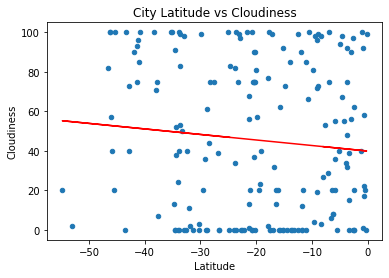

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [19]:
linear_regression_plot(southern_df, 'Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005
The line equation is: y = 0.07x + 1.99
This shows a weak or non-existent explanatory relationship between Latitude and Wind Speed. An r-squared of 0.005 is not great.
Correlation is not causation tho. Which is good, because this is weak sauce.


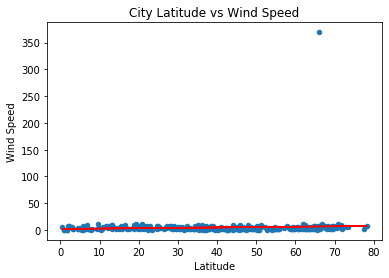

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [20]:
linear_regression_plot(northern_df, 'Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1
The line equation is: y = -0.06x + 2.39
This shows a weak or non-existent explanatory relationship between Latitude and Wind Speed. An r-squared of 0.1 is not great.
Correlation is not causation tho. Which is good, because this is weak sauce.


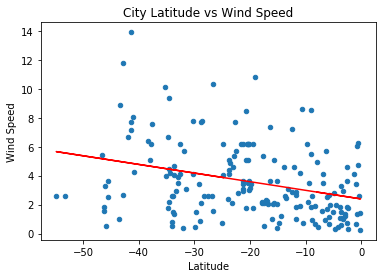

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [21]:
linear_regression_plot(southern_df, 'Wind Speed')